# Michael Bell

## How do changes in population affect the Housing Price Index across Canada?

    I will be looking at how changes in the populations of various regions across Canada affect the Housing Price Index of those same regions. I suspect that there will be a close connection between the two, with growing populations increasing the price of housing and thus the HPI for the region.

In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [51]:
popIncFile = ("../data/raw/population-by-region-1946-2022 (1).csv")
canHPIFile = ("../data/raw/hpi_by_region.csv")

In [52]:
popDataSet = pd.read_csv(popIncFile)
canHPIDataSet = pd.read_csv(canHPIFile)

In [53]:
canHPIDataSet.head()

,Unnamed: 0,Type,Month-year,Canada,Atlantic Region,Newfoundland and Labrador,Prince Edward Island,Nova Scotia,New Brunswick,Quebec,...,Manitoba,Saskatchewan,Alberta,British Columbia,"Kelowna, British Columbia","Vancouver, British Columbia","Victoria, British Columbia",Month-Year,year,month
0,0,House and Land,Jan-81,38.2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,90.5,128.7,1981-01-01,1981,1
1,1,House and Land,Feb-81,38.7,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,92.2,130.1,1981-02-01,1981,2
2,2,House and Land,Mar-81,39.3,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,92.2,130.8,1981-03-01,1981,3
3,3,House and Land,Apr-81,39.9,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,91.8,130.8,1981-04-01,1981,4
4,4,House and Land,May-81,40.6,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,91.8,132.5,1981-05-01,1981,5


In [54]:
canHPIDataSet.tail()

,Unnamed: 0,Type,Month-year,Canada,Atlantic Region,Newfoundland and Labrador,Prince Edward Island,Nova Scotia,New Brunswick,Quebec,...,Manitoba,Saskatchewan,Alberta,British Columbia,"Kelowna, British Columbia","Vancouver, British Columbia","Victoria, British Columbia",Month-Year,year,month
1489,1489,Land only,Feb-22,116.1,102.8,102.4,103.1,103.5,102.5,119.0,...,110.2,100.8,103.7,119.7,118.6,120.9,108.7,2022-02-01,2022,2
1490,1490,Land only,Mar-22,116.5,102.8,102.4,104.5,103.5,102.5,120.5,...,110.4,101.1,104.6,120.2,118.6,121.3,111.4,2022-03-01,2022,3
1491,1491,Land only,Apr-22,116.7,102.8,102.4,104.5,103.5,102.5,120.5,...,110.6,101.3,104.8,120.6,118.6,121.7,111.4,2022-04-01,2022,4
1492,1492,Land only,May-22,116.8,102.8,102.4,104.5,103.5,102.5,120.5,...,110.6,101.3,105.4,120.6,118.6,121.7,111.4,2022-05-01,2022,5
1493,1493,Land only,Jun-22,117.0,102.8,102.4,104.5,103.5,102.5,120.5,...,110.6,101.3,106.0,120.8,118.6,121.9,111.4,2022-06-01,2022,6


In [55]:
canHPIDataSet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1494 entries, 0 to 1493
Data columns (total 37 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Unnamed: 0                             1494 non-null   int64  
 1   Type                                   1494 non-null   object 
 2   Month-year                             1494 non-null   object 
 3   Canada                                 1494 non-null   float64
 4   Atlantic Region                        1314 non-null   float64
 5   Newfoundland and Labrador              1314 non-null   float64
 6   Prince Edward Island                   990 non-null    float64
 7   Nova Scotia                            1314 non-null   float64
 8   New Brunswick                          1314 non-null   float64
 9   Quebec                                 1314 non-null   float64
 10  Quebec City, Quebec                    1494 non-null   float64
 11  Sher

### Initial thoughts on the HPI data

    Early records appear to be incomplete, however many columns are without any Null entries, and many are close, so I believe with mild trimming there should be no problem using this data to compare with the population data. It's also divided into many specific regions, which should be useful in getting direct comparisons.

In [56]:
popDataSet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3839 entries, 0 to 3838
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   REF_DATE             3839 non-null   object
 1   GEO                  3839 non-null   object
 2   DGUID                3678 non-null   object
 3   VECTOR               3839 non-null   object
 4   COORDINATE           3839 non-null   int64 
 5   Population estimate  3839 non-null   int64 
dtypes: int64(2), object(4)
memory usage: 180.1+ KB


In [57]:
popDataSet

,REF_DATE,GEO,DGUID,VECTOR,COORDINATE,Population estimate
0,Jan-46,Canada,2016A000011124,v1,1,12188000
1,Apr-46,Canada,2016A000011124,v1,1,12241000
2,Jul-46,Canada,2016A000011124,v1,1,12316000
3,Oct-46,Canada,2016A000011124,v1,1,12393000
4,Jan-47,Canada,2016A000011124,v1,1,12450000
...,...,...,...,...,...,...
3834,Apr-22,Alberta,2016A000248,v15,10,4500917
3835,Apr-22,British Columbia,2016A000259,v3,11,5286528
3836,Apr-22,Yukon,2016A000260,v4,12,43249
3837,Apr-22,Northwest Territories,2016A000261,v6,14,45607


### Initial thoughts on the population data

    There is very little missing data here, and it is divided by province/territory, which should pair well with the HPI data that is divided among similar lines. The HPI data does not include the territories, however, so the population data for those will not be useful to me.

# Exploring the Data, Graphically!

[Text(0.5, 1.0, 'HPI Over Years, Canada-Wide')]

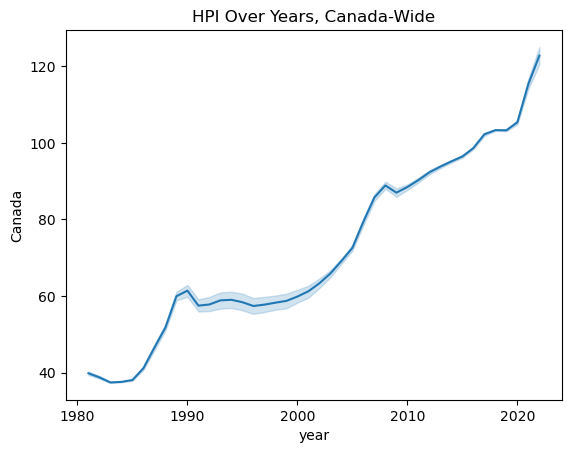

In [58]:
sns.lineplot(data=canHPIDataSet, x="year", y="Canada").set(title="HPI Over Years, Canada-Wide")

### Comments

    This shows the general trend of the HPI scores Canada wide, from the 1980s to 2020. We can see an incline that seems to go through slower periods, but inevitably spikes upwards again. Next, I'd like to see how the various regions compare to each other.

[Text(0.5, 1.0, 'Correlation Matrix of HPI Scores Across Canada')]

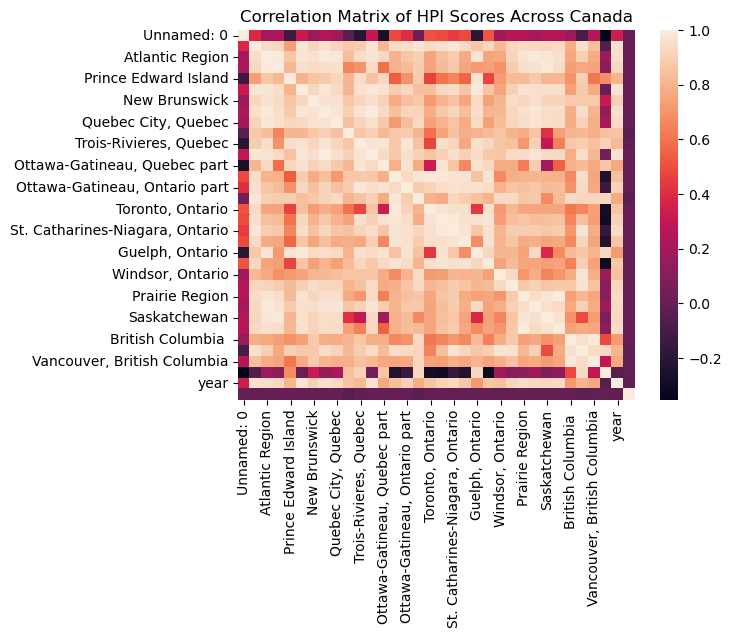

In [43]:
sns.heatmap(canHPIDataSet.corr()).set(title="Correlation Matrix of HPI Scores Across Canada")

### Comments

    The correlation matrix of HPI scores suggests that HPI scores grow fairly consistently across all regions. This should allow me to somewhat explain the change in HPI in all the regions by investigating one area closer. 

[Text(0.5, 1.0, 'HPI Over Years in Quebec')]

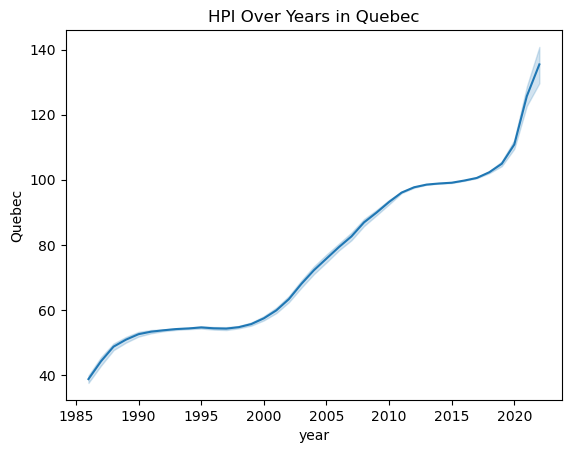

In [60]:
sns.lineplot(data=canHPIDataSet, x="year", y="Quebec").set(title="HPI Over Years in Quebec")

### Comments

    We can see that Quebec follows a similar, although smoother pattern in HPI scores. This most likely means the jagged line in the first line plot comes from significant differences during certain short periods, that overall balance out to increase similarly. Next, I'd like to see how Quebec's population growth compares.

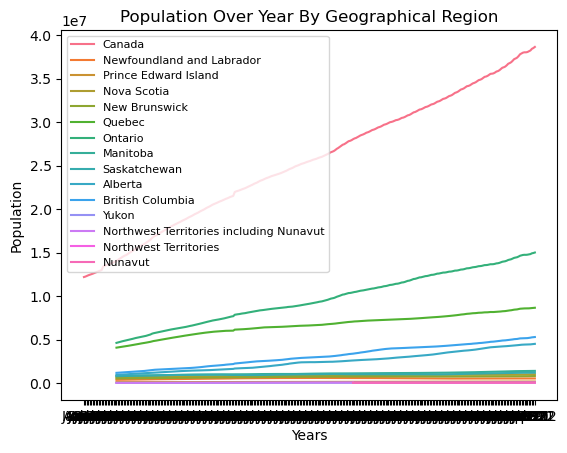

In [73]:
sns.lineplot(data=popDataSet, x="REF_DATE", y="Population estimate", hue="GEO").set(title="Population Over Year By Geographical Region", ylabel="Population", xlabel="Years")
plt.legend(fontsize='8')

### Comments

    As seen here, the population growth of each region is fairly linear. This is an interesting discover, and will warrant further investigation. 